<a href="https://colab.research.google.com/github/wrwilliam/My-Projects/blob/main/WeiRuan_assignment2_ok_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 2 
Wei Ruan
001532991

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#datset uploaded in my github repo
url="https://raw.githubusercontent.com/wrwilliam/my_data7390/main/Titanic_full.csv"

In [3]:
# loading data to colab platform
df=pd.read_csv(url,encoding="unicode_escape")
# df=pd.read_csv(url)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [6]:
# checking non-null data count
print('total number of null values : {0}'.format(df.isna().sum().sum()))

total number of null values : 1280


In [7]:
# drop unimportant information 

df1 = df.drop(["Name","Cabin","Ticket"],axis = 1)
print(df1.shape)
df1.head(3)

(1309, 9)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


<Axes: xlabel='Feature', ylabel='Percent missing'>

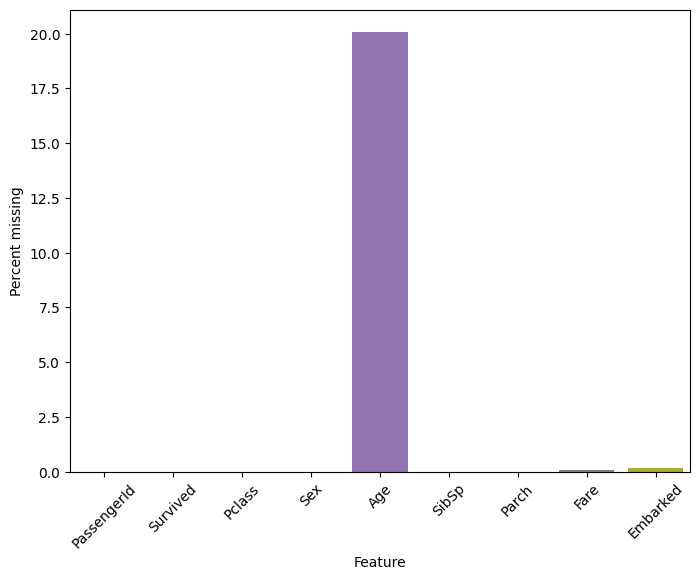

In [8]:
''' Deal with missing values'''

null_vals = df1.isnull().sum()/len(df1)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [9]:
df1.shape

(1309, 9)

In [10]:
df1["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [11]:
# filling the null value 
df1["Embarked"] = df1["Embarked"].fillna('S')

In [12]:
df1.count()

PassengerId    1309
Survived       1309
Pclass         1309
Sex            1309
Age            1046
SibSp          1309
Parch          1309
Fare           1308
Embarked       1309
dtype: int64

In [13]:
df1["Age"].mean()

29.881137667304014

In [14]:
# mean value to fill null 
df1["Age"] = df1["Age"].fillna(df1["Age"].mean())

In [15]:
#check null count 
df1.count()

PassengerId    1309
Survived       1309
Pclass         1309
Sex            1309
Age            1309
SibSp          1309
Parch          1309
Fare           1308
Embarked       1309
dtype: int64

In [16]:
df1["Fare"] = df1["Fare"].fillna(df1["Fare"].mean())

In [17]:
#double check the null value for each column
df1.count()

PassengerId    1309
Survived       1309
Pclass         1309
Sex            1309
Age            1309
SibSp          1309
Parch          1309
Fare           1309
Embarked       1309
dtype: int64

In [18]:
df1.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


In [19]:
#dealing with text information, convert to number classification

df1["Sex"] = df1["Sex"].map({"male":0,"female":1})

In [20]:
# d={'C':0,'S':1,'Q':2}
df1["Embarked"] = df1["Embarked"].map({'C':0,'S':1,'Q':2})

In [21]:
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,1
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,0,35.0,0,0,8.0500,1


In [22]:
df1.shape

(1309, 9)

In [23]:
# show the relationship of each feature
corr = df1.corr()
corr.shape

(9, 9)

<Axes: >

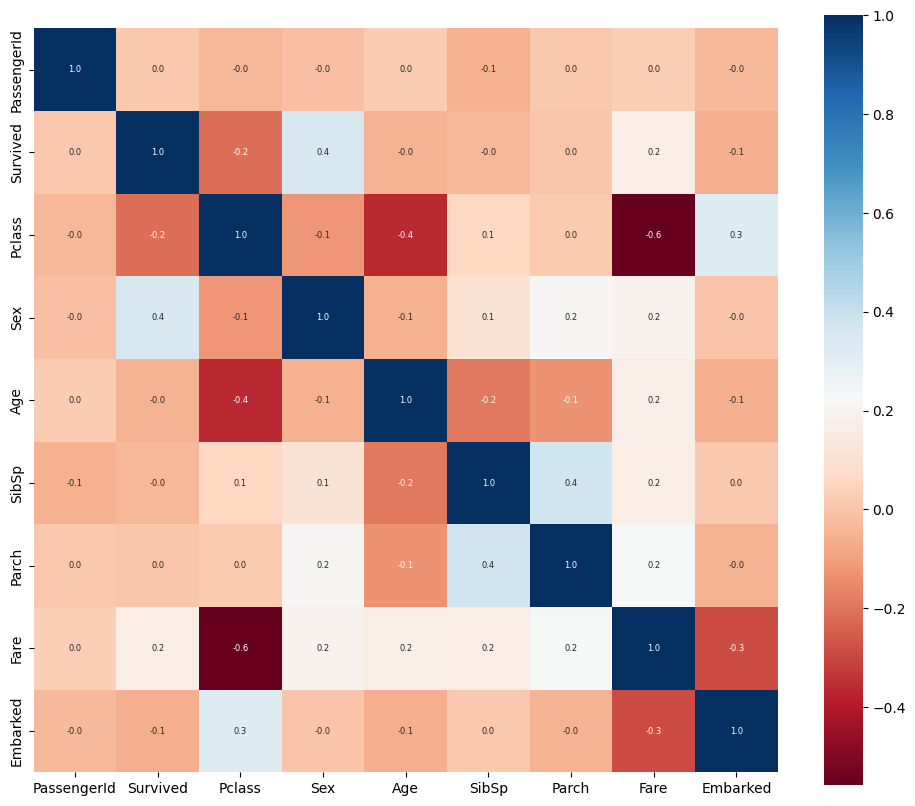

In [24]:

plt.figure(figsize=(12,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':6}, cmap='RdBu')

In [25]:
#separte x and y 

y = df1["Survived"]
X = df1.drop(["Survived"], axis=1)
X = np.array(X)
y = np.array(y)


In [26]:
# sperate dataset into training dataset and testing dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)


In [27]:
# get the type of training dataset
type(X_train)

numpy.ndarray

In [28]:
X_train.shape

(1047, 8)

In [29]:
# #perform normalization on the input data set
input_data= X_train
mean_data = np.mean(input_data, axis=0)
std_data = np.std(input_data, axis=0)

train_x = (X_train - mean_data)/std_data
test_x = (X_test - mean_data)/std_data

In [30]:
#  y_train data shape
print(y_train.shape)
print(y_train.ndim)

(1047,)
1


In [31]:
y_train.reshape(-1,1) 

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [32]:
print(y_train.shape)
print(y_train.ndim)

(1047,)
1


In [33]:
y_test.reshape(-1,1)
print(y_test.ndim)

1


**Sigmoid activity Functions**

In [34]:
#Defining the initial weights and bias
weight = np.zeros(X_train.shape[1])  
bias = 0

In [35]:
#Defining the sigmoid function 
import math

def SigmoidFun(x):
    return 1 / (1 + math.exp(-x))

In [36]:
#get loss value of each iteration 

from collections import defaultdict

loss = 0
y_pred = defaultdict(list)
for i in range(X_train.shape[0]):
    y_pred = SigmoidFun(np.dot(X_train[i],weight) + bias) # get the result from caculation 
    y = y_train[i]
    loss += np.multiply(np.log(y_pred), y) + np.multiply(np.log(1-y_pred), 1-y)  # dot multiply 
loss = - loss/X_train.shape[1]      # get the loss value
print(loss)

90.71563725578088


In [37]:
# Defining the accuracy metrics 
#  to count how many value has been evaluated as same as true, and the this count divide the total number to get the accuracy.
def metrics(y_true, predicted_y):
    true_count = 0  # initial o value has been estimate as true
    for i in range(len(y_true)): 
        if (y_true[i]>0.5) == (predicted_y[i]>0.5): # if the predicted possibity more than 0.5, it will be considered as true.
            true_count += 1
    return true_count / float(len(y_true)) * 100.0

In [38]:
#Initializing hyperparameters
initial_epoch = 100
step_length = 0.01
record_set = {"training_loss":[],"testing_loss":[],"train_acc":[],"test_acc":[]}

In [39]:
# to iterate the train database and get the loss value and predicted possiblity of each round
def fit(X_a,y_b):
    y_pred = []  # define a prediction value list to hold each round predicted y value
    loss = 0
    for i in range(X_a.shape[0]):
        y_pred_current = SigmoidFun(np.dot(X_a[i],weight) + bias)        
        loss += np.multiply(np.log(y_pred_current), y_b[i])+ np.multiply(np.log(1-y_pred_current), 1-y_b[i])   # acculate loss value
        y_pred.append(y_pred_current)  # add current predicted value to the list
    loss = -loss/X_a.shape[1]   # to get finial loss of this round
    
    return y_pred, loss



In [40]:
# update bias value 

def renew_bias(curr_bias):
    init_bias = 0
    new_w = np.zeros(len(weight))
    for i in range(X_train.shape[0]):        
        init_bias += (y_pred[i] - y_train[i])*(y_pred[i])*(1-y_pred[i]) #dJ/db
        for j in range(len(weight)):
            new_w[j] += (y_pred[i] - y_train[i])*(y_pred[i])*(1-y_pred[i])*(X_train[i][j])

#Update the bias value
    new_bias = curr_bias - init_bias*step_length/X_train.shape[0]     # 
    
    return new_w, new_bias

In [41]:
# update the weight value W
def renew_w(new_w): 
    for i in range(len(weight)):
        weight[i] = weight[i] - new_w[i]*step_length/X_train.shape[0]
    
    return weight

In [42]:
# training data and monitoring the lossing changes

for i in range(initial_epoch):

    y_pred, loss = fit(X_train,y_train)
    y_pred_test, loss_test = fit(X_test,y_test)
       
    loss_test = loss_test/(2*X_test.shape[0])
    trainAcc = metrics(y_train,y_pred)
    testAcc = metrics(y_test,y_pred_test)
    
    record_set["training_loss"].append(loss)
    record_set["testing_loss"].append(loss_test)
    record_set["train_acc"].append(trainAcc)
    record_set["test_acc"].append(testAcc)
    
    
    if i%10==5:

        print("===============")
        print(f'Training loss:{loss}')
        print(f'Training loss:{loss_test }')
       
    y_pred = np.array(y_pred)
    
    grad_w, bias = renew_bias(bias)
    
    weight = renew_w(grad_w)

Training loss:6349.0380642697855
Training loss:3.3766162321498303
Training loss:6326.319710771602
Training loss:3.364953810317863
Training loss:6303.191849974785
Training loss:3.3530657916109496
Training loss:6279.960803354212
Training loss:3.3411040183969627
Training loss:6256.948593996496
Training loss:3.3292295414432083
Training loss:6234.512791464164
Training loss:3.3176228557105385
Training loss:6213.065612177149
Training loss:3.306493520866193
Training loss:6192.987607193705
Training loss:3.2960363436721205
Training loss:6174.431174908426
Training loss:3.2863315412053136
Training loss:6157.227465969763
Training loss:3.2772968629906134


In [43]:

from sklearn.metrics import confusion_matrix

y_pred_cm = np.rint(y_pred)

cm = confusion_matrix(y_train, y_pred_cm, labels=[0, 1])


In [44]:


for epoch in range(initial_epoch):
  if epoch%50 == 0: 
    print("===============") 
    print("Training accuracy: %f" %(trainAcc))
    print("Validation accuracy: %f" %(testAcc))

Training accuracy: 61.795606
Validation accuracy: 60.305344
Training accuracy: 61.795606
Validation accuracy: 60.305344


In [45]:
tp = cm [0][0]
fp = cm [1][0]
tn = cm [1][1]
fn = cm [0][1]

precision = tp / (tp + fp)
recall = tp / (tp + fp)

f1 = 2 * (precision * recall) / (precision + recall)

print("F1 score: {}".format(f1,2))

F1 score: 0.6172248803827751


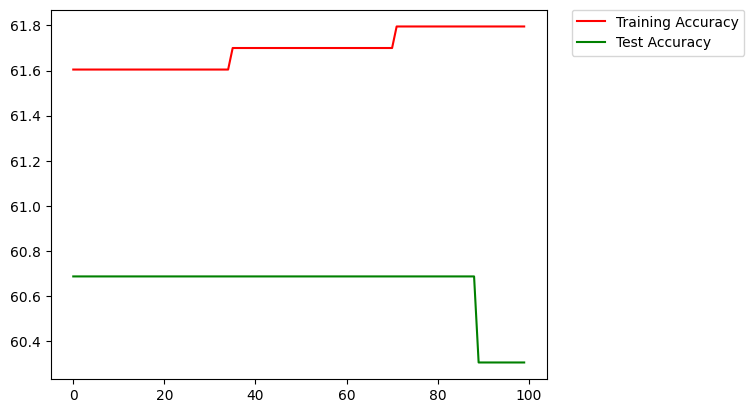

In [46]:
plt.plot(record_set['train_acc'],label='Training Accuracy',color='red')
plt.plot(record_set['test_acc'],label='Test Accuracy',color='green')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

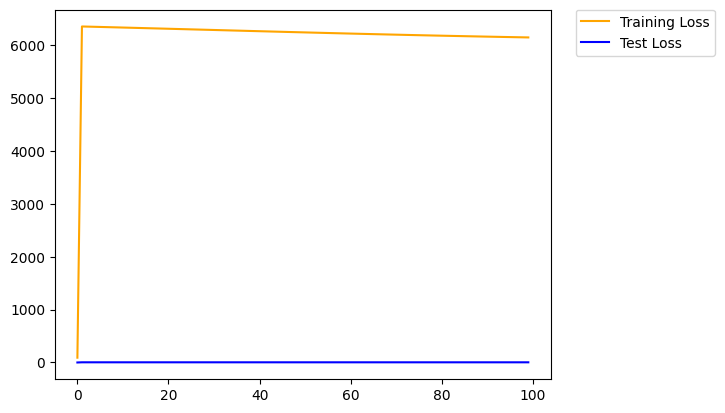

In [47]:
plt.plot(record_set['training_loss'],label='Training Loss',color='orange')
plt.plot(record_set['testing_loss'],label='Test Loss',color='blue')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Relu active function**

In [48]:
def ReLu(x):
    return max(0.0, x)

In [49]:
loss = 0
y_pred = defaultdict(list)
for i in range(X_train.shape[0]):
    y_pred = ReLu(np.dot(X_train[i],weight) + bias)
    y = y_train[i]
    loss += (y - y_pred)*(y - y_pred)
loss = loss/2

In [50]:
#training dataset
def fit_relu(X_a,y_a):
    y_pred = []
    loss = 0
    for i in range(X_a.shape[0]):
        y_pred_temp = ReLu(np.dot(X_a[i],weight) + bias)        
        loss += (y_a[i] - y_pred_temp)*(y_a[i] - y_pred_temp) 
        y_pred.append(y_pred_temp)
    loss = loss/(2 * X_a.shape[0])
    
    return y_pred, loss


In [51]:
#Training the neural network with relu activation function
initial_epoch = 100

for epoch in range(initial_epoch):

  y_pred, loss = fit_relu(X_train,y_train)
  y_pred_test, loss_test = fit_relu(X_test,y_test)
        
  loss_test = loss_test/(2*X_test.shape[0])
  trainAcc = metrics(y_train,y_pred)
  testAcc = metrics(y_test,y_pred_test)
    
  record_set["training_loss"].append(loss)
  record_set["testing_loss"].append(loss_test)
  record_set["train_acc"].append(trainAcc)
  record_set["test_acc"].append(testAcc)
    
    
  if epoch%10==5:
    print("Training loss:%f" %(loss))
    print("test loss:%f" %(loss_test))
 
        
  y_pred = np.array(y_pred)  


  grad_w, bias = renew_bias(bias)
    
  weight = renew_w(grad_w)

Training loss:0.191294
test loss:0.000375
Training loss:0.191252
test loss:0.000375
Training loss:0.191218
test loss:0.000375
Training loss:0.191190
test loss:0.000375
Training loss:0.191171
test loss:0.000375
Training loss:0.191188
test loss:0.000375
Training loss:0.191253
test loss:0.000375
Training loss:0.191299
test loss:0.000375
Training loss:0.191358
test loss:0.000375
Training loss:0.191465
test loss:0.000375


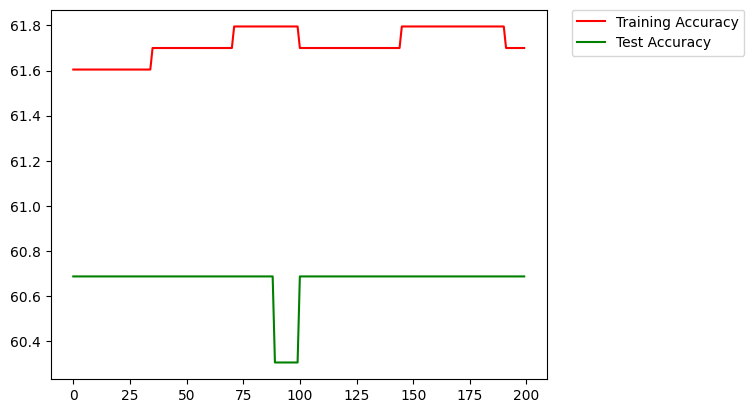

In [52]:
plt.plot(record_set['train_acc'],label='Training Accuracy',color='red')
plt.plot(record_set['test_acc'],label='Test Accuracy',color='green')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [53]:
y_pred_cm = np.rint(y_pred)

cm = confusion_matrix(y_train, y_pred_cm, labels=[0, 1])


In [54]:
for epoch in range(initial_epoch):
  if epoch%5 == 0: 
    print("===============") 
    print("Training accuracy: %f" %(trainAcc))
    print("Validation accuracy: %f" %(testAcc))

Training accuracy: 61.700096
Validation accuracy: 60.687023
Training accuracy: 61.700096
Validation accuracy: 60.687023
Training accuracy: 61.700096
Validation accuracy: 60.687023
Training accuracy: 61.700096
Validation accuracy: 60.687023
Training accuracy: 61.700096
Validation accuracy: 60.687023
Training accuracy: 61.700096
Validation accuracy: 60.687023
Training accuracy: 61.700096
Validation accuracy: 60.687023
Training accuracy: 61.700096
Validation accuracy: 60.687023
Training accuracy: 61.700096
Validation accuracy: 60.687023
Training accuracy: 61.700096
Validation accuracy: 60.687023
Training accuracy: 61.700096
Validation accuracy: 60.687023
Training accuracy: 61.700096
Validation accuracy: 60.687023
Training accuracy: 61.700096
Validation accuracy: 60.687023
Training accuracy: 61.700096
Validation accuracy: 60.687023
Training accuracy: 61.700096
Validation accuracy: 60.687023
Training accuracy: 61.700096
Validation accuracy: 60.687023
Training accuracy: 61.700096
Validation 

In [55]:
tp = cm [0][0]
fp = cm [1][0]
tn = cm [1][1]
fn = cm [0][1]

precision = tp / (tp + fp)
recall = tp / (tp + fn)

f1 = 2 * (precision * recall) / (precision + recall)

print("F1 score: {}".format(round(f1,2)))

F1 score: 0.76


In [56]:
# ===========================================================